In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# CCTV 데이터와 인구 데이터 읽기 -> 데이터프레임에 저장
# CCTV 데이터와 인구 데이터 병합 ("자치구" 컬럼 기준) -> 새 데이터프레임에 저장
# 총계, 최근증가율, 한국인, 외국인, 고령자, 외국인비율, 고령자비율 컬럼의 데이터만 뽑기
# 상관관계 확인
# "자치구" 컬럼을 인덱스로 변경
# "자치구" 인덱스를 일반 컬럼으로 변경

In [2]:
seoul_cctv = pd.read_csv("data-files/processed-seoul-cctv.csv")
seoul_population = pd.read_csv("data-files/processed-seoul-population.csv")

In [3]:
seoul_cctv.head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근 증가율
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,0.462334
1,중 구,2584,130,87,77,236,240,372,386,155,361,403,137,0.535354
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,0.939373
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,0.365845
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,0.465263


In [4]:
seoul_population.head()

,자치구,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
0,종로구,72524,152211,141379,10832,1.95,27958,0.183679,0.071164
1,중구,63139,130785,120437,10348,1.91,25055,0.191574,0.079122
2,용산구,109805,233284,218650,14634,1.99,39037,0.167337,0.062730
3,성동구,133305,288234,281000,7234,2.11,47720,0.165560,0.025098
4,광진구,169291,351252,337416,13836,1.99,54071,0.153938,0.039391


In [5]:
pd.merge(left=seoul_cctv, right=seoul_population,
         # on="자치구",                        # 병합 기준 컬럼 이름이 같을 때
         left_on="자치구", right_on="자치구",   # 병합 기준 컬럼 이름이 다를 때
         how="outer")

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,2022년,최근 증가율,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
0,종로구,1980.0,36.0,540.0,107.0,161.0,131.0,158.0,152.0,69.0,...,291.0,0.462334,72524.0,152211.0,141379.0,10832.0,1.95,27958.0,0.183679,0.071164
1,중 구,2584.0,130.0,87.0,77.0,236.0,240.0,372.0,386.0,155.0,...,137.0,0.535354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2847.0,44.0,50.0,68.0,83.0,295.0,491.0,115.0,322.0,...,334.0,0.939373,109805.0,233284.0,218650.0,14634.0,1.99,39037.0,0.167337,0.062730
3,성동구,4047.0,58.0,99.0,110.0,366.0,279.0,945.0,459.0,647.0,...,232.0,0.365845,133305.0,288234.0,281000.0,7234.0,2.11,47720.0,0.165560,0.025098
4,광진구,3480.0,507.0,82.0,84.0,64.0,21.0,465.0,443.0,709.0,...,271.0,0.465263,169291.0,351252.0,337416.0,13836.0,1.99,54071.0,0.153938,0.039391
5,동대문구,2759.0,1.0,4.0,12.0,107.0,802.0,711.0,201.0,218.0,...,259.0,0.341926,169873.0,353601.0,336644.0,16957.0,1.98,64468.0,0.182318,0.047955
6,중랑구,4193.0,224.0,331.0,104.0,145.0,153.0,170.0,215.0,1074.0,...,294.0,0.735513,187413.0,390140.0,385318.0,4822.0,2.06,74920.0,0.192034,0.012360
7,성북구,4842.0,137.0,170.0,229.0,322.0,594.0,811.0,867.0,714.0,...,338.0,0.259625,197082.0,441984.0,430397.0,11587.0,2.18,77475.0,0.175289,0.026216
8,강북구,3321.0,0.0,21.0,16.0,68.0,210.0,4.0,375.0,963.0,...,797.0,1.004225,144313.0,297702.0,293660.0,4042.0,2.03,66307.0,0.222729,0.013577
9,도봉구,2247.0,103.0,2.0,79.0,72.0,103.0,117.0,200.0,202.0,...,586.0,1.559226,138356.0,313989.0,311694.0,2295.0,2.25,66998.0,0.213377,0.007309


In [6]:
seoul_cctv['자치구'] = seoul_cctv['자치구'].str.replace(" ", "") #공백 제거
seoul_cctv.head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근 증가율
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,0.462334
1,중구,2584,130,87,77,236,240,372,386,155,361,403,137,0.535354
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,0.939373
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,0.365845
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,0.465263


In [8]:
seoul_cctv_population = pd.merge(left=seoul_cctv, right=seoul_population,
                                 # on="자치구",                        # 병합 기준 컬럼 이름이 같을 때
                                 left_on="자치구", right_on="자치구",   # 병합 기준 컬럼 이름이 다를 때
                                 how="outer")

In [9]:
seoul_cctv_population.head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,2022년,최근 증가율,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
0,종로구,1980,36,540,107,161,131,158,152,69,...,291,0.462334,72524,152211,141379,10832,1.95,27958,0.183679,0.071164
1,중구,2584,130,87,77,236,240,372,386,155,...,137,0.535354,63139,130785,120437,10348,1.91,25055,0.191574,0.079122
2,용산구,2847,44,50,68,83,295,491,115,322,...,334,0.939373,109805,233284,218650,14634,1.99,39037,0.167337,0.062730
3,성동구,4047,58,99,110,366,279,945,459,647,...,232,0.365845,133305,288234,281000,7234,2.11,47720,0.165560,0.025098
4,광진구,3480,507,82,84,64,21,465,443,709,...,271,0.465263,169291,351252,337416,13836,1.99,54071,0.153938,0.039391


In [12]:
seoul_cctv_population.rename(columns={"최근 증가율":"최근증가율"}, inplace=True)

In [13]:
seoul_cctv_population2 = \
    seoul_cctv_population[["총계", "최근증가율", "한국인", "외국인", "고령자", "외국인비율", "고령자비율"]]
seoul_cctv_population2.head()

,총계,최근증가율,한국인,외국인,고령자,외국인비율,고령자비율
0,1980,0.462334,141379,10832,27958,0.071164,0.183679
1,2584,0.535354,120437,10348,25055,0.079122,0.191574
2,2847,0.939373,218650,14634,39037,0.062730,0.167337
3,4047,0.365845,281000,7234,47720,0.025098,0.165560
4,3480,0.465263,337416,13836,54071,0.039391,0.153938


In [16]:
cctv_population_corr = seoul_cctv_population2.corr()

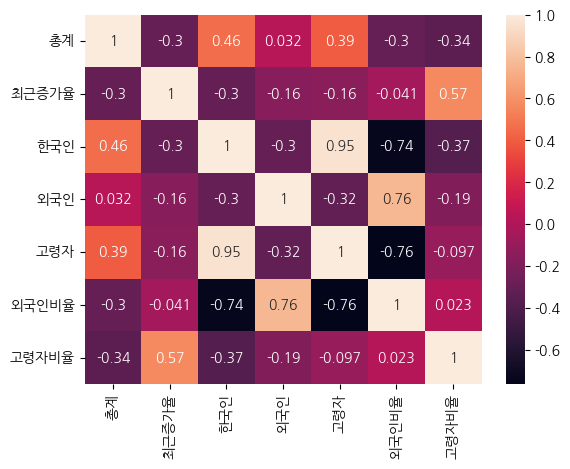

In [22]:
sns.heatmap(cctv_population_corr, annot=True)
plt.show()

In [26]:
seoul_cctv_population.set_index(["자치구"], inplace=True)
seoul_cctv_population.head()

,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,...,2022년,최근증가율,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,1980,36,540,107,161,131,158,152,69,250,...,291,0.462334,72524,152211,141379,10832,1.95,27958,0.183679,0.071164
중구,2584,130,87,77,236,240,372,386,155,361,...,137,0.535354,63139,130785,120437,10348,1.91,25055,0.191574,0.079122
용산구,2847,44,50,68,83,295,491,115,322,623,...,334,0.939373,109805,233284,218650,14634,1.99,39037,0.167337,0.062730
성동구,4047,58,99,110,366,279,945,459,647,485,...,232,0.365845,133305,288234,281000,7234,2.11,47720,0.165560,0.025098
광진구,3480,507,82,84,64,21,465,443,709,172,...,271,0.465263,169291,351252,337416,13836,1.99,54071,0.153938,0.039391


In [30]:
seoul_cctv_population.reset_index(drop=False, inplace=True)
seoul_cctv_population.head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,2022년,최근증가율,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
0,종로구,1980,36,540,107,161,131,158,152,69,...,291,0.462334,72524,152211,141379,10832,1.95,27958,0.183679,0.071164
1,중구,2584,130,87,77,236,240,372,386,155,...,137,0.535354,63139,130785,120437,10348,1.91,25055,0.191574,0.079122
2,용산구,2847,44,50,68,83,295,491,115,322,...,334,0.939373,109805,233284,218650,14634,1.99,39037,0.167337,0.062730
3,성동구,4047,58,99,110,366,279,945,459,647,...,232,0.365845,133305,288234,281000,7234,2.11,47720,0.165560,0.025098
4,광진구,3480,507,82,84,64,21,465,443,709,...,271,0.465263,169291,351252,337416,13836,1.99,54071,0.153938,0.039391
